# Projeto 3: Verificação da eficiência da campanha sobre vendas de depósito bancário a prazo por meio de telemarketing

Um banco português solicitou uma pesquisa sobre a eficiência da campanha sobre vendas de depósito bancário a longo prazo por meio de telemarketing, i.e. por algum meio de contato telefônico. O potencial cliente é submetido à uma série de questionamentos onde as respostas são registradas como mostram os campos abaixo, que como podem ser percebidos há alguns com valores categóricos e numéricos, que são as variáveis independentes. O resultado da abordagem pode induzir o potencial cliente a adquirir um plano de depósito bancário a longo prazo, ou não. Isto é representado por uma variável dependente "y", que contém um valor categórico yes (sim) ou não (no). O nosso problema é tentar encontrar um modelo de predição que meça a eficiência da campanha, baseado no dataset [2], que é um repositório de dados de machine learning disponibilizado ao público, depois de uma pesquisa realizada por um banco português [1]. Para tentar resolver esse problema, vamos utilizar um classificador Supervised Learning, como já é dado uma variável dependente. Logistic Regression é a primeira opção.

Regressão Logística, ou Logistic Regression, em Machine Learning é uma técnica de aprendizado supervisionado que consiste na regressão de um modelo matemático que relaciona variáveis de entrada $X{_i} (i=1,2,...,n)$ a diferentes grupos de classificação. Para isso, é usada a função \textit{Sigmoid} para determinar a probabilidade de um determinado conjunto de variáveis a pertencerem a determinado grupo:

$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

Assim como em Regressões Lineares, na Regressão Logística o melhor modelo de classificação é encontrado através da utilização do algoritmo de Gradiente Descendente, atualizando os valores de $\theta{_j}$ até encontrar o minímo da função custo $J$:

$$J(\theta) = -\frac{1}{m}\displaystyle\sum_{i=1}^{m}y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$$

Quando o melhor modelo de classificação é encontrado, tal classificação está relacionado apenas a uma classe, sendo considerado um modelo de classificação binária por apenas determinar se um dado pode ser considerado da classe em questão ou não.

### Dados do cliente do banco:
<ol>
<li>age (numeric)</li>
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')</li>
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)</li>
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</li>
<li>default: has credit in default? (categorical: 'no','yes','unknown')</li>
<li>housing: has housing loan? (categorical: 'no','yes','unknown')</li>
<li>loan: has personal loan? (categorical: 'no','yes','unknown')</li>
</ol>

### Dados relativos ao último contato dentro da campanha corrente
<ol>
<li value="8">contact: contact communication type (categorical: 'cellular','telephone')</li>
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'</li>
<li>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
</ol>

### Outras atividades:
<ol>
<li value="12">campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric).</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').</li>
</ol>

### Atributos do contexto social e econômico
<ol>
<li value='16'>emp.var.rate: employment variation rate - quarterly indicator (numeric)</li>
<li>cons.price.idx: consumer price index - monthly indicator (numeric)</li>
<li>cons.conf.idx: consumer confidence index - monthly indicator (numeric)</li>
<li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
<li>nr.employed: number of employees - quarterly indicator (numeric)</li>
</ol>

### Variável Dependente (variável de predição):
<ol>
<li value='21'>y - has the client subscribed a term deposit? (binary: 'yes','no')</li>
</ol>

### Referência 

<p>[1] [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014</p>

<p>[2] Bank Marketing Data Set, Machine Learning Repository, http://archive.ics.uci.edu/ml/datasets/Bank+Marketing, accessed: 2020-07-15</p>

## 1. Extração e Exploração dos Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data=pd.read_csv('bank-additional-full.csv',header=0,sep=';')
data=data.dropna()
import warnings
warnings.filterwarnings('ignore')
print('dimensões do dataframe: ',data.shape)
print(' ')
print("colunas: ",list(data.columns))
print(" ")
data.info()
print(" ")
print(data.describe())

dimensões do dataframe:  (41188, 21)
 
colunas:  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campa

Nota: Observa-se que 25%, 50%, 75% e o max da amostra da variável pdays está em 999, que significa que o cliente não foi previamente contatado em nenhuma campanha prévia. Algum tratamento deverá ser realizado.

Em relação ao age (idade), a mediana (50o. percentil) e a média de idade dos clientes é cerca de 40 anos. A duração média da chamada é de 259 segundos (4.3 min), se bem que a mediana é mais baixa 102s (1.7min). Na média, os clientes foram contactados (campaign) 2.5 vezes e uma mediana de 2. Na maior parte das vezes, os clientes nunca foram antes contactados (pdays), o valor 999 está presente no 1o quartil, mediana e no 3o quartil. O que é corroborado pelo contato prévio (previous) com uma média menor que 1 contato, antes desta campanha. Possivelmente, não houve uma campanha de marketing agressiva anteriormente. A taxa de emprego (emp.var.rate) não varia substancialmente, nem o índice de preço ao consumidor (cons.price.idx), nem o número de emprego (nr.employed) e nem o índice de confiança ao consumidor (cons.conf.idx). O euribor3m mostra alguma evolução com o passar do tempo. 

Abaixo observa-se a distribuição do pdays

In [2]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Nota: o valor 999 pode corromper a estatística do pdays. O grande número de 999 indica que a maioria não foi contactado anteriormente.

### Verificação dos dados categóricos

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Nota: Observa-se variáveis numéricas e categoricas

In [4]:
cat_col = [n for n in data.columns if data[n].dtypes == 'object']
for col in cat_col:
    print(col, '**********************  \n')
    print(data[col].value_counts())
    print("  ")

job **********************  

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
  
marital **********************  

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
  
education **********************  

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
  
default **********************  

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
  
housing **********************  

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Nota: a variável dependente y deverá ser reatribuída com valores (0,1) em vez de (no, yes). A variável contact pode ser binária também, i.e. cellular pode ser 0 e telephone pode ser 1. A grosso modo, foram contactados clientes com perfil bastante conservador. Na maioria, são profissionais administrativos (job-admin), com educação universitária (university.degree), estado civil casado, a maioria admitiu não estar endividado (apenas 3 admitiu), a situação crediária indica que a maior parte tem dívida com a casa própria (housing yes), a maior indica que não tem empréstimos pessoais (loan). Os meses (month) contactados foram em grande monta no período primavera-verão europeu. Os clientes foram contactados em todos os dias da semana, como mostrada pela distribuíção equitativa dos dias. Como percebido anteriormente, a campanha de marketing anterior (poutcome) para a maioria foi inexistente ou falhou. A variável y é o resultado da campanha de marketing atual, com apenas 11% de sucesso (yes 4640).

### Verificação de subscrições obtidas depois da campanha

No_sub= 36548  Sub= 4640
Porcentagem de subscrição:  11.265417111780131
Porcentagem de sem subscrição:  88.73458288821988


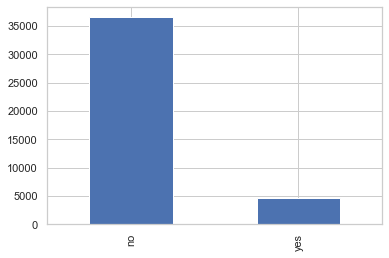

In [5]:
No_sub = len(data[data['y']=='no'])
Sub = len(data[data['y']=='yes'])
print('No_sub=',No_sub,' Sub=',Sub)
percent_No_sub = (No_sub/len(data['y']))*100
percent_sub=(Sub/len(data['y']))*100
print('Porcentagem de subscrição: ',percent_sub)
print('Porcentagem de sem subscrição: ',percent_No_sub)

data['y'].value_counts().plot.bar()

Nota: yes e no pode ser transformado em valores binários 1 e 0, respectivamente. Apenas 11.26% se subscreveram ao depósito a termo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290BC6DC288>,
      dtype=object)

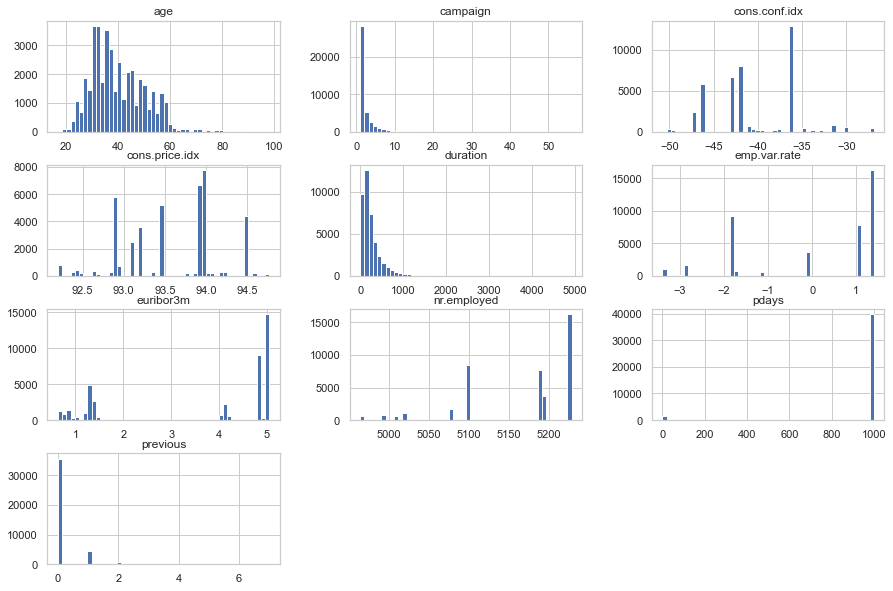

In [6]:
data.hist(bins=50,figsize=(15,10))

Nota: pdays necessita de um ajuste. Não é razoável que pdays contenha valores em dias depois do último contato e 999 significar que não houve um prévio contato.

## 2. Preparação de Dados

### 2.1 Preparação da variável dependente y

In [7]:
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y']=np.where(data['y'] =='no',  0, data['y'])

### 2.2 Tratamento da variável pdays e contact

In [8]:
data['pdays_no_contact']=(data['pdays']==999)*1
contact=({'cellular':0, 'telephone':1})
data['contact']=data['contact'].map(contact)

### 2.3 Criação de variáveis dummy para variáveis categóricas

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,services,married,high.school,unknown,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,services,married,high.school,no,yes,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,services,married,high.school,no,no,yes,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


Nota: foi criado uma coluna adicional pdays_no_contact e a coluna contact ficou binária, cellular=0, telephone=1. A variável dependente y ficou binária também 0 (no) e 1 (yes), i.e. não e sim para a subscrição à campanha de venda de depósito a prazo.

In [10]:
df=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan',
                                  'month','day_of_week','poutcome'], drop_first=True)

df.shape

(41188, 55)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  object 
 12  pdays_no_contact               41188 non-null 

In [12]:
df.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0


Nota: variáveis categóricas foram transformadas em binárias

### 2.4 Balanceamento de amostras com o algoritmo SMOTE (Synthetic Minority Oversampling Technique).

O SMOTE opera na criação de amostras sintéticas da classe menor (no-subscription) em vez de criar cópias.

O mesmo escolhe de forma aleatória o k-nearest-neighbors e com a qual se cria uma cópia similar, mas com novas observações.

Se implementa o SMOTE da seguinte forma:

conda install -c conda-forge imbalanced-learn

conda update --all

In [13]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
columns = X_train.columns

In [14]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train.astype(int))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data for training is ",len(os_data_X))
print("Number of no subscription in oversampled data for training",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription for training",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data for trainining is ",
      len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data for training is ",
      len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print(" ")
os_test_X,os_test_y=os.fit_sample(X_test, y_test.astype(int))
os_test_X = pd.DataFrame(data=os_test_X,columns=columns )
os_test_y= pd.DataFrame(data=os_test_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data for test is ",len(os_test_X))
print("Number of no subscription in oversampled data for test",len(os_test_y[os_test_y['y']==0]))
print("Number of subscription for test",len(os_test_y[os_test_y['y']==1]))
print("Proportion of no subscription data in oversampled data for test is ",
      len(os_test_y[os_test_y['y']==0])/len(os_test_X))
print("Proportion of subscription data in oversampled data for test is ",
      len(os_test_y[os_test_y['y']==1])/len(os_test_X))
print(" ")

length of oversampled data for training is  65766
Number of no subscription in oversampled data for training 32883
Number of subscription for training 32883
Proportion of no subscription data in oversampled data for trainining is  0.5
Proportion of subscription data in oversampled data for training is  0.5
 
length of oversampled data for test is  7330
Number of no subscription in oversampled data for test 3665
Number of subscription for test 3665
Proportion of no subscription data in oversampled data for test is  0.5
Proportion of subscription data in oversampled data for test is  0.5
 


Nota: A proporção de amostras com subscrição ao deposito à prazo é equivalente à da amostra com sem subscrição. 90% da amostra é deixada para treinamento e 10% para teste.

### 2.5 Normalização dos dados

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_training=sc.fit_transform(os_data_X)
X_testing=sc.transform(os_test_X)

## 3. Treinando os dados

### 3.1 Obtenção do Modelo 

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_training,os_data_y)
print('Score de treinamento: ',clf.score(X_training,os_data_y))

Score de treinamento:  0.936426116838488


### 3.2 Obtenção da Matriz de Confusão

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range(0, cm.shape[0]):
        for j in range(0, cm.shape[1]):
            if(cm[i, j]>2500):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center", color="white")
                         #color="black" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center", color="black")
                         #color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Data')
    plt.xlabel('Predicted Data')

In [18]:
y_pred = clf.predict(X_training)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(os_data_y,y_pred)
cm

array([[31008,  1875],
       [ 2306, 30577]], dtype=int64)

Confusion matrix, without normalization


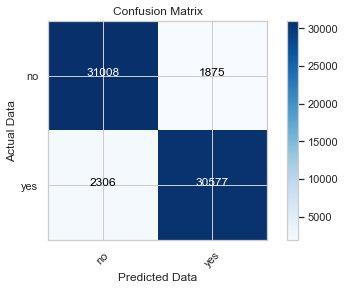

In [20]:
classes = ['no', 'yes']
plot_confusion_matrix(cm,classes=classes, normalize=False,title='Confusion Matrix')

Nota: As respostas corretas TP (verdadeiro positivo, yes-yes) e TN (verdadeiro negativo, no-no), azul escuro, compõem a maior parte das respostas. As respostas erradas FP (falso positivo, no-yes) e FN (falso negativo, yes-no) compõem a menor parte das respostas.

## 3.3 CRV: Classification

In [19]:
from sklearn.metrics import classification_report
print(classification_report(os_data_y.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     32883
           1       0.94      0.93      0.94     32883

    accuracy                           0.94     65766
   macro avg       0.94      0.94      0.94     65766
weighted avg       0.94      0.94      0.94     65766



Nota: Valores acima de 0.90 mostra no precision, recall e f1-score mostra um alto grau de ajuste

## 3.4 CRV: ROC 

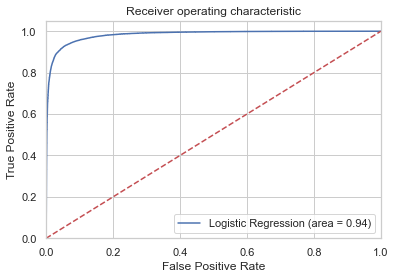

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(os_data_y.astype(int), clf.predict(X_training.astype(float)))
fpr, tpr, thresholds = roc_curve(os_data_y.astype(int), clf.predict_proba(X_training.astype(float))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC > 90%

# 4. Testando o Modelo

## 4.1 Aquisição e verificação dos dados para teste

Já realizado no capítulo 1.

## 4.2 Preparação dos dados

Já realizado no capítulo 2.

## 4.3 Criação de variáveis dummy

Já realizado no capítulo 2.3

## 4.4 Separação da variável dependente (y) e variáveis independentes (X)
Já realizado no capítulo 2.4

## 4.5 Normalização dos dados
Já realizado no capítulo 2.5

## 4.6 Aplicação do modelo 
Já realizado parcialmente no capítulo 3.1

In [25]:
clf.fit(X_testing,os_test_y)
print("Test score: ", clf.score(X_testing, os_test_y))

Test score:  0.9481582537517054


## 4.7 Aplicação da Matriz de Confusão

In [26]:
y2_pred = clf.predict(X_testing)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(os_test_y.astype(int),y2_pred.astype(int))
cm2

array([[3507,  158],
       [ 222, 3443]], dtype=int64)

Confusion matrix, without normalization


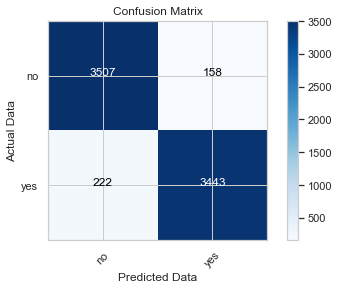

In [27]:
classes = ['no', 'yes']
plot_confusion_matrix(cm2, classes=classes, normalize=False,title='Confusion Matrix')

Nota: Valores na matriz de confusão mostra-se bastante equilibrada.

## 4.8 Classificação

In [28]:
from sklearn.metrics import classification_report
print(classification_report(os_test_y.astype(int), y2_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3665
           1       0.96      0.94      0.95      3665

    accuracy                           0.95      7330
   macro avg       0.95      0.95      0.95      7330
weighted avg       0.95      0.95      0.95      7330



Nota: Praticamente todos os índices foram maiores que 90%. Isso mostra que o modelo de predição está bem ajustado.

## 4.9 Curva ROC 

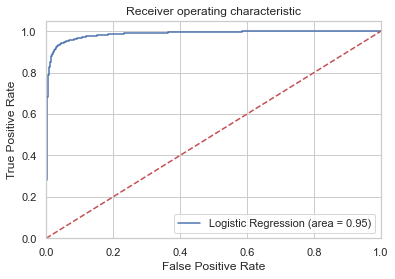

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2 = roc_auc_score(os_test_y.astype(int), clf.predict(X_testing.astype(float)))
fpr2, tpr2, thresholds2 = roc_curve(os_test_y.astype(int), clf.predict_proba(X_testing.astype(float))[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Note: AUC maior que .9 mostra que o modelo está bem ajustado.

## 5. Análise Qualitativa

A análise qualitativa foi realizada por meio dos dados de treinamento, pois são os dados que formaram o modelo.

## 5.1 Variáveis de Treinamento do Modelo

In [31]:
os_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            65766 non-null  int64  
 1   contact                        65766 non-null  int64  
 2   duration                       65766 non-null  int64  
 3   campaign                       65766 non-null  int64  
 4   pdays                          65766 non-null  int64  
 5   previous                       65766 non-null  int64  
 6   emp.var.rate                   65766 non-null  float64
 7   cons.price.idx                 65766 non-null  float64
 8   cons.conf.idx                  65766 non-null  float64
 9   euribor3m                      65766 non-null  float64
 10  nr.employed                    65766 non-null  float64
 11  pdays_no_contact               65766 non-null  int32  
 12  job_blue-collar                65766 non-null 

Nota: Logistic Regression nativamente não traz informações sobre pValue, assim
não é possível avaliar a importância das features. No entanto, o pacote estatístico statsmodels
pode listar o pValue das variáveis.

In [32]:
headx=os_data_X.columns
print(headx)

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'pdays_no_contact', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexist

In [33]:
from matplotlib import pyplot
headx=os_data_X.columns
orders={}
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    orders[headx[i]]=v
sorted_orders=sorted(orders.items(),key=lambda x: x[1],reverse=True)
for i in sorted_orders:
    print(i[0],i[1])
    #print(i,headx[i]," score:",v)
	#print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

euribor3m 2.1383141930055656
duration 2.0100223226021736
poutcome_success 0.37812880752331723
cons.conf.idx 0.3130802125792953
education_illiterate 0.12358247704824993
cons.price.idx 0.09995944052159696
month_mar 0.05973141719785474
age 0.044569707084595504
default_yes -0.00024217063138244323
housing_unknown -0.06356945936672061
loan_unknown -0.06356945936672061
job_student -0.09500970463242847
month_dec -0.09713902902199817
job_unemployed -0.10313459572908806
job_unknown -0.12535355486419789
poutcome_nonexistent -0.128645598939032
pdays_no_contact -0.1405821301748517
campaign -0.14138834873108228
loan_yes -0.14500837324467458
job_technician -0.1607252861377198
job_services -0.1813969914284219
job_self-employed -0.21783748439756845
pdays -0.22442726471266136
marital_unknown -0.22892525507988312
job_retired -0.2528768050951531
housing_yes -0.2754621533982295
month_oct -0.2969419470312492
job_entrepreneur -0.31702953519134425
month_jun -0.32455713436699357
month_sep -0.32980873218270657


Note: Os valores positivos indicam that realizou predição com class 1 (subscreveu ao plano) e negativos indicam que features que indicaram classe 0, i.e. que predisseram que não subscreveram ao plano. As features que mais contribuíram para as respostas positivas pela ordem foram euribor3m, duration, poutcome_success, cons.conf.idx, education_illiterate, cons.price.idx,
month_mar, age.

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y.astype(int),os_data_X.astype(int))

result=logit_model.fit()
print(result.summary2())

         Current function value: 0.170418
         Iterations: 35
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.754     
Dependent Variable:             y                          AIC:                        22521.3680
Date:                           2020-08-06 21:24           BIC:                        23003.3425
No. Observations:               65766                      Log-Likelihood:             -11208.   
Df Model:                       52                         LL-Null:                    -45586.   
Df Residuals:                   65713                      LLR p-value:                0.0000    
Converged:                      0.0000                     Scale:                      1.0000    
No. Iterations:                 35.0000                                                          
----------------------------------------------------------------------------------------------

Nota: variáveis cujo pValue < 0.05 (5%) pode rejeitar a hipótese Ho, no qual a variável não é significante para a composição da variável dependente y. Dessa forma, podemos deduzir que as seguintes variáveis são não significantes: marital_unknown (estado civil desconhecido), education_illiterate (nível educacional analfabeto), default_yes (tem problema crediário), housing_unknown (dívida habitacional), loan_unknown (empréstimo financeiro pessoal), poutcome_success (sucesso na campanha anterior). Possivelmente, porque os montantes para esses casos não são significativos. E também que nessas categorizações, os clientes parecem não ser favoráveis a aceitar uma campanha de depósito a termo, seja por de falta de liquidez, exposição da situação econômica indesejada, ou mesmo por falta de significância.

## 5.2 RFE Recursive Feature Elimination

Foi mostrado até o capítulo 4 que todas as features são necessárias para o ótimo ajuste do modelo.

Vamos tentar eliminar algumas features para ver se há alguma feature melhor que outras. Levando em conta que temos 54 features.

### 5.2.1 50 Features mais importantes

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 50)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
print(reduceddataset.info())

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            65766 non-null  int64  
 1   contact                        65766 non-null  int64  
 2   duration                       65766 non-null  int64  
 3   campaign                       65766 non-null  int64  
 4   pdays                          65766 non-null  int64  
 5   previous                 

Nota: RFE nos ajudou a escolher 50 features mais significativas. Foram eliminadas pdays_no_contact, marital_unknown, education_illiterate, default_yes.


### 5.2.2 40 Features mais importantes

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 40)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
print(reduceddataset.info())

[False  True False False False  True  True False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True False  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True  True]
[ 9  1  8  2 11  1  1  3 10  5  7 15  1  1  1  1  1  1  1  1  1  1  1  1
  1 12  1  1  1 13  1  1  1  1 14  1  1  1  1  1  6  1  1  4  1  1  1  1
  1  1  1  1  1  1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   contact                        65766 non-null  int64  
 1   previous                       65766 non-null  int64  
 2   emp.var.rate                   65766 non-null  float64
 3   job_blue-collar                65766 non-null  uint8  
 4   job_entrepreneur              

Nota: Sairam as features age, duration, campaign, pdays, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, job_unemployed,
month_dec


### 5.2.3 30 Features mais importantes

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
print(reduceddataset.info())

[False  True False False False False False False False False False False
  True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True False  True  True  True  True False False
 False False False  True False  True  True False  True  True False False
  True  True  True  True False  True]
[19  1 18 12 21  8 11 13 20 15 17 25  1  1  1  1  1  1  1  9  1  1  1  1
  1 22  1  1  1 23  1  1  1  1 24  2  6  5  3  1 16  1  1 14  1  1 10  4
  1  1  1  1  7  1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   contact                        65766 non-null  int64
 1   job_blue-collar                65766 non-null  uint8
 2   job_entrepreneur               65766 non-null  uint8
 3   job_housemaid                  65766 non-null  uint8
 4   job_management                 65766 non-n

Note: Sairam as features: emp.var.rate, previous, job_student, job_unemployed, housing_unknwon, housing_yes, loan_unknown,
loan_yes, month_mar, month_oct, month_sep.

### 5.2.4 20 Features mais importantes

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
print(reduceddataset.info())

[False  True False False False False False False False False False False
  True  True  True False False  True  True False False  True  True False
 False False  True  True  True False  True  True  True False False False
 False False False False False False False False False  True False False
  True  True  True  True False  True]
[29  1 28 22 31 18 21 23 30 25 27 35  1  1  1  6  5  1  1 19  7  1  1 10
  9 32  1  1  1 33  1  1  1  8 34 12 16 15 13  2 26  3 11 24  4  1 20 14
  1  1  1  1 17  1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   contact                        65766 non-null  int64
 1   job_blue-collar                65766 non-null  uint8
 2   job_entrepreneur               65766 non-null  uint8
 3   job_housemaid                  65766 non-null  uint8
 4   job_self-employed              65766 non-n

Note: Sairam as features job_management, job_retired, job_technician, marital_married, marital_single, default_unknown, month_aug, month_jul, month_jun, month_may

### 5.2.5 10 Features mais importantes

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
reduceddataset=os_data_X[os_data_X.columns[rfe.support_]]
print(reduceddataset.info())

[False False False False False False False False False False False False
  True False  True False False False False False False False False False
 False False  True  True  True False  True  True  True False False False
 False False False False False False False False False False False False
  True False False False False  True]
[39  5 38 32 41 28 31 33 40 35 37 45  1  7  1 16 15  8  9 29 17 10  6 20
 19 42  1  1  1 43  1  1  1 18 44 22 26 25 23 12 36 13 21 34 14 11 30 24
  1  4  2  3 27  1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65766 entries, 0 to 65765
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_blue-collar                65766 non-null  uint8
 1   job_housemaid                  65766 non-null  uint8
 2   education_basic.6y             65766 non-null  uint8
 3   education_basic.9y             65766 non-null  uint8
 4   education_high.school          65766 non-n

Nota: Sairam as features: contact, job_entrepreneur, job_self-employed, job_services, job_unemployed, job_unknown, month_nov, 
day_of_week_thu, day_of_week_tue, day_of_week_wed. As 10 features mais importantes são: job_blue_collar (operário), job_housemaid (empregada doméstica), education_basic.6y (educação básica com 6 anos), education_basic.9y (educação básica
com 9 anos), education_high_school (ensino médio), education_professional.course (ensino profissionalizante), education_university.degree (universitário), education_unknown (educação desconhecida), day_of_week_mon (segunda-feira), poutcome_success (subscreveu na campanha prévia com sucesso).

## 5.3 Análise dos Casos

### 5.3.1 Variáveis numéricas

In [40]:
from scipy.stats import ttest_ind
min_max_scaler=preprocessing.MinMaxScaler()

In [41]:
#Xyes = os_data_X.loc[:, os_data_y ==1df.columns != 'y']
#y = df.loc[:, df.columns == 'y']
temp=pd.concat([os_data_y, os_data_X], axis=1)
positiveX=temp.loc[temp['y']==1]
negativeX=temp.loc[temp['y']==0]
positiveX.describe()

,y,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,32883.0,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,...,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000
mean,1.0,40.122617,0.079859,547.051851,1.727640,789.437612,0.364748,-1.241372,93.362271,-39.836292,...,0.115531,0.035642,0.028586,0.026184,0.050087,0.075084,0.065535,0.067056,0.598942,0.180701
std,0.0,13.018596,0.271079,397.754198,1.288936,405.332572,0.708787,1.612641,0.657854,5.934829,...,0.319666,0.185398,0.166643,0.159684,0.218127,0.263531,0.247472,0.250123,0.490120,0.384776
min,1.0,17.000000,0.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,31.000000,0.000000,251.000000,1.000000,999.000000,0.000000,-2.323820,92.893000,-46.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,36.000000,0.000000,441.000000,1.000000,999.000000,0.000000,-1.800000,93.200000,-40.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,48.000000,0.000000,735.000000,2.000000,999.000000,1.000000,0.006391,93.954379,-36.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,98.000000,1.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
negativeX.describe()

,y,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,32883.0,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,...,32883.000000,32883.000000,32883.00000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000
mean,0.0,39.912052,0.391175,220.607274,2.629809,984.266521,0.131162,0.252644,93.605208,-40.577295,...,0.352249,0.101177,0.01107,0.008698,0.209105,0.206703,0.194934,0.197579,0.888058,0.013016
std,0.0,9.908418,0.488021,206.981497,2.860325,120.045133,0.407240,1.481820,0.558937,4.388039,...,0.477678,0.301567,0.10463,0.092855,0.406676,0.404946,0.396156,0.398179,0.315300,0.113344
min,0.0,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,32.000000,0.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.0,38.000000,0.000000,163.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,47.000000,1.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.0,95.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Idade

In [43]:
ttest_ind(negativeX['age'], positiveX['age'])

Ttest_indResult(statistic=-2.3338832859526284, pvalue=0.019604830126074998)

Nota: age (idade) diferem nas respostas positivas e negativas, pValue>1%, portanto a idade parece não importar com a decisão de se subscriber à campanha ou não. As idades contactadas não diferem em casos positivos e negativos. Os clientes abordados tem em média 40 anos.

euribor3m

In [44]:
print(positiveX['euribor3m'].describe())
print(" ")
print(negativeX['euribor3m'].describe())
ttest_ind(negativeX['euribor3m'], positiveX['euribor3m'])

count    32883.000000
mean         2.110123
std          1.734904
min          0.634000
25%          0.845149
50%          1.269474
75%          4.475099
max          5.045000
Name: euribor3m, dtype: float64
 
count    32883.000000
mean         3.816446
std          1.636055
min          0.634000
25%          1.405000
50%          4.857000
75%          4.962000
max          5.045000
Name: euribor3m, dtype: float64


Ttest_indResult(statistic=129.75431592970918, pvalue=0.0)

Nota: Diferentes taxa euribor3m aplicada às respostas positivas e negativas com pvalue<1%. 
A taxa euribor3m estava 55% do que estava para quem teve resposta negativa.

nr.employed

In [45]:
print(positiveX['nr.employed'].describe())
print(" ")
print(negativeX['nr.employed'].describe())
ttest_ind(negativeX['nr.employed'], positiveX['nr.employed'])

count    32883.000000
mean      5094.405180
std         87.372375
min       4963.600000
25%       5016.996735
50%       5099.100000
75%       5191.000000
max       5228.100000
Name: nr.employed, dtype: float64
 
count    32883.000000
mean      5176.289627
std         64.576757
min       4963.600000
25%       5099.100000
50%       5195.800000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


Ttest_indResult(statistic=136.6692742854364, pvalue=0.0)

Nota: Número de empregos são diferem nas respostas positivas e negativas com pvalue<1%. 
O número de empregos estava 98% do número de emprego das respostas negativas.

duration

In [46]:
ttest_ind(negativeX['duration'], positiveX['duration'])

Ttest_indResult(statistic=-132.0211203200052, pvalue=0.0)

Nota: duration (duração) diferem nas respostas positivas e negativas com pValue<1%.
Para casos positivos, a duração média do contato durou 547 segundos ou cerca de 9 min.
Para casos negativos, a duração da chamada durou 220 segundos ou cerca de 3.7 min.


pdays

In [47]:
ttest_ind(negativeX['pdays'], positiveX['pdays'])

Ttest_indResult(statistic=83.57384110415482, pvalue=0.0)

Nota: pdays diferem nas respostas positivas e negativas com pValue<1%

previous

In [48]:
ttest_ind(negativeX['previous'], positiveX['previous'])

Ttest_indResult(statistic=-51.81688333222926, pvalue=0.0)

Nota: previous (contato prévio) diferem em casos positivos e negativos com pvalue < 1%.

emp.var.rate

In [49]:
print(positiveX['emp.var.rate'].describe())
print(" ")
print(negativeX['emp.var.rate'].describe())
ttest_ind(negativeX['nr.employed'], positiveX['nr.employed'])
ttest_ind(negativeX['emp.var.rate'], positiveX['emp.var.rate'])

count    32883.000000
mean        -1.241372
std          1.612641
min         -3.400000
25%         -2.323820
50%         -1.800000
75%          0.006391
max          1.400000
Name: emp.var.rate, dtype: float64
 
count    32883.000000
mean         0.252644
std          1.481820
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


Ttest_indResult(statistic=123.70388202331078, pvalue=0.0)

Nota: emp.var.rate(taxa de emprego) diferem em casos positivos e negativos com pvalue < 1%. A taxa de variação do emprego estava negativo e positivo para aqueles que responderam negativo.

cons.price.idx

In [50]:
print(positiveX['cons.price.idx'].describe())
print(" ")
print(negativeX['cons.price.idx'].describe())
ttest_ind(negativeX['nr.employed'], positiveX['nr.employed'])
ttest_ind(negativeX['cons.price.idx'], positiveX['cons.price.idx'])

count    32883.000000
mean        93.362271
std          0.657854
min         92.201000
25%         92.893000
50%         93.200000
75%         93.954379
max         94.767000
Name: cons.price.idx, dtype: float64
 
count    32883.000000
mean        93.605208
std          0.558937
min         92.201000
25%         93.075000
50%         93.918000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


Ttest_indResult(statistic=51.03261303888685, pvalue=0.0)

Nota: cons.price.idx(índice de preço ao consumidor) diferem em casos positivos e negativos com pvalue < 1%. O índice do preço ao consumidor estava 99% daqueles que responderam negativamente. 

cons.conf.idx

In [51]:
print(positiveX['cons.conf.idx'].describe())
print(" ")
print(negativeX['cons.conf.idx'].describe())
ttest_ind(negativeX['cons.conf.idx'], positiveX['cons.conf.idx'])

count    32883.000000
mean       -39.836292
std          5.934829
min        -50.800000
25%        -46.200000
50%        -40.300000
75%        -36.100000
max        -26.900000
Name: cons.conf.idx, dtype: float64
 
count    32883.000000
mean       -40.577295
std          4.388039
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


Ttest_indResult(statistic=-18.20534511139932, pvalue=7.114961182450291e-74)

Nota: cons.conf.idx(índice de confiança ao consumidor) diferem em casos positivos e negativos com pvalue < 1%.
O índice ao consumidor no caso positivo estava 1.85% a mais que no caso negativo.

### 5.3.2 Análise dias da semana (day_of_week)

In [52]:
print("day_of_week for positive cases")
print("monday","tuesday","wednesday","thursday")
print(positiveX['day_of_week_mon'].value_counts().tolist()[1]," ",positiveX['day_of_week_tue'].value_counts().tolist()[1], \
      "  ",positiveX['day_of_week_wed'].value_counts().tolist()[1],"    ",positiveX['day_of_week_thu'].value_counts().tolist()[1])
print(" ")
print("day_of_week for negative cases")
print("monday","tuesday","wednesday","thursday")
print(negativeX['day_of_week_mon'].value_counts().tolist()[1]," ",negativeX['day_of_week_tue'].value_counts().tolist()[1], \
      "  ",negativeX['day_of_week_wed'].value_counts().tolist()[1],"    ",negativeX['day_of_week_thu'].value_counts().tolist()[1])

day_of_week for positive cases
monday tuesday wednesday thursday
1647   2155    2205      2469
 
day_of_week for negative cases
monday tuesday wednesday thursday
6876   6410    6497      6797


Nota: Os dias da semana para abordar o cliente estão aparentemente uniformemente distribuídos durante a semana, aparentemente não relevante para influenciar na decisão de se subscriber ou não ao plano de depósito a termo. Mas, segunda-feira foi considerado uma das 10 features mais importante.

### 5.3.3 Nível Escolar (Education)

In [53]:
print("education for position cases")
print("basic.6y","basic.9y","high.school","illiterate","professional.course", "university.degree", "unknown")
print(positiveX['education_basic.6y'].value_counts().tolist()[1],"    ",positiveX['education_basic.9y'].value_counts().tolist()[1], \
      "    ",positiveX['education_high.school'].value_counts().tolist()[1],"      ",positiveX['education_illiterate'].value_counts().tolist()[1], \
      "        ",positiveX['education_professional.course'].value_counts().tolist()[1],"              ",positiveX['education_university.degree'].value_counts().tolist()[1], \
      "            ",positiveX['education_unknown'].value_counts().tolist()[1])
print(" ")
print("education for negative cases")
print("basic.6y","basic.9y","high.school","illiterate","professional.course", "university.degree", "unknown")
print(negativeX['education_basic.6y'].value_counts().tolist()[1],"   ",negativeX['education_basic.9y'].value_counts().tolist()[1], \
      "   ",negativeX['education_high.school'].value_counts().tolist()[1],"      ",negativeX['education_illiterate'].value_counts().tolist()[1], \
      "       ",negativeX['education_professional.course'].value_counts().tolist()[1],"              ",negativeX['education_university.degree'].value_counts().tolist()[1], \
      "            ",negativeX['education_unknown'].value_counts().tolist()[1])

education for position cases
basic.6y basic.9y high.school illiterate professional.course university.degree unknown
260      796      2395        3          1027                5834              348
 
education for negative cases
basic.6y basic.9y high.school illiterate professional.course university.degree unknown
1862     5036     7580        14         4186                9463              1342


Nota: variável illiterate (analfabeto) pode ser descartada pois representa uma minoria absoluta em quaisquer casos.
Para casos positivos, a educação university.degree (universitário) e high.school (ensino médio) parecem importar mais.

### 5.3.4 Profissão (job)

In [54]:
print("job for positive cases")
print("blue-collar","entrepreneur","housemaid","management","retired", "self-employed", "services","student","technician", \
     "unemployed","unknown")
print(positiveX['job_blue-collar'].value_counts().tolist()[1],"      ",positiveX['job_entrepreneur'].value_counts().tolist()[1], \
      "        ",positiveX['job_housemaid'].value_counts().tolist()[1],"     ",positiveX['job_management'].value_counts().tolist()[1], \
      "      ",positiveX['job_retired'].value_counts().tolist()[1],"  ",positiveX['job_self-employed'].value_counts().tolist()[1], \
      "         ",positiveX['job_services'].value_counts().tolist()[1],"    ",positiveX['job_student'].value_counts().tolist()[1], \
      "   ",positiveX['job_technician'].value_counts().tolist()[1],"     ",positiveX['job_unemployed'].value_counts().tolist()[1], \
      "      ",positiveX['job_unknown'].value_counts().tolist()[1])
print(" ")
print("job for negative cases")
print("blue-collar","entrepreneur","housemaid","management","retired", "self-employed", "services","student","technician", \
     "unemployed","unknown")
print(negativeX['job_blue-collar'].value_counts().tolist()[1],"      ",negativeX['job_entrepreneur'].value_counts().tolist()[1], \
      "       ",negativeX['job_housemaid'].value_counts().tolist()[1],"     ",negativeX['job_management'].value_counts().tolist()[1], \
      "     ",negativeX['job_retired'].value_counts().tolist()[1],"  ",negativeX['job_self-employed'].value_counts().tolist()[1], \
      "        ",negativeX['job_services'].value_counts().tolist()[1],"   ",negativeX['job_student'].value_counts().tolist()[1], \
      "   ",negativeX['job_technician'].value_counts().tolist()[1],"     ",negativeX['job_unemployed'].value_counts().tolist()[1], \
      "      ",negativeX['job_unknown'].value_counts().tolist()[1])

job for positive cases
blue-collar entrepreneur housemaid management retired self-employed services student technician unemployed unknown
1452        162          125       448        1612    159           441      564     1492       166        33
 
job for negative cases
blue-collar entrepreneur housemaid management retired self-employed services student technician unemployed unknown
7735        1197         863       2304       1145    1152          3280     536     5437       789        264


Nota: Para casos positivos, os empregos technician (técnico), retired (aposentado), blue-collar (operário) parecem importar mais. Importando menos, mas ainda significativo são management (administrativo), student (estudante).

### 5.3.5 Poutcome

In [55]:
print("poutcome for positive cases")
print("nonexistent","success")
print(positiveX['poutcome_nonexistent'].value_counts().tolist()[1],"     ",positiveX['poutcome_success'].value_counts().tolist()[1])
print(" ")
print("poutcome for negative cases")
print("nonexistent","success")
print(negativeX['poutcome_nonexistent'].value_counts().tolist()[1],"      ",negativeX['poutcome_success'].value_counts().tolist()[1])

poutcome for positive cases
nonexistent success
13188       5942
 
poutcome for negative cases
nonexistent success
3681        428


Nota: clientes poutcome nonexistent (clientes novos) são a maioria para os casos positivos, poutcome success (viraram clientes
na campanha passada) formam um grupo significativo. 

### 5.3.6 Contact

In [56]:
print("contact for positive cases")
print("cellular","telephone")
print(positiveX['contact'].value_counts().tolist()[0],"  ",positiveX['contact'].value_counts().tolist()[1])
print(" ")
print("contact for negative cases")
print("cellular","telephone")
print(negativeX['contact'].value_counts().tolist()[0],"  ",negativeX['contact'].value_counts().tolist()[1])

contact for positive cases
cellular telephone
30257    2626
 
contact for negative cases
cellular telephone
20020    12863


Nota: contato via celular (cellular) parece formam a maior em quaisquer caso. Para casos negativos, contatos via telephone (telephone) forma um grupo significativo.

### 5.3.7 Estado Civil (marital status)

In [57]:
print("marital for positive cases")
print("married","single","unknown")
print(positiveX['marital_married'].value_counts().tolist()[1]," ",positiveX['marital_single'].value_counts().tolist()[1], " ",\
     positiveX['marital_unknown'].value_counts().tolist()[1])
print(" ")
print("marital for negative cases")
print("married","single","unknown")
print(negativeX['marital_married'].value_counts().tolist()[1]," ",negativeX['marital_single'].value_counts().tolist()[1], " ",\
     negativeX['marital_unknown'].value_counts().tolist()[1])

marital for positive cases
married single unknown
11748   6544   12
 
marital for negative cases
married single unknown
12729   8943   62


Nota: a variável marital_unknown não é significativo para quaisquer caso. Estado civil casado (married), solteiro (single) representam grupos significativos para quaisquer casos.

### 5.3.8 Endividado (default)

In [58]:
print("default for positive cases")
print("unknown","yes")
print(positiveX['default_unknown'].value_counts().tolist()[1],"   ",positiveX['default_yes'].value_counts().tolist()[0])
print(" ")
print("default for negative cases")
print("unknown","yes")
print(negativeX['default_unknown'].value_counts().tolist()[1],"  ",negativeX['default_yes'].value_counts().tolist()[1])

default for positive cases
unknown yes
983     32883
 
default for negative cases
unknown yes
7305    3


Nota: default_yes, deveria ser index [1], só tem o [0], está corrompido para casos positivos, não pode ter o mesmo tamanho da amostra. Descartado.

### 5.3.9 Financiamento imobiliário

In [59]:
print("housing for positive cases")
print("unknown","yes")
print(positiveX['housing_unknown'].value_counts().tolist()[1],"   ",positiveX['housing_yes'].value_counts().tolist()[1])
print(" ")
print("housing for negative cases")
print("unknown","yes")
print(negativeX['housing_unknown'].value_counts().tolist()[1],"   ",negativeX['housing_yes'].value_counts().tolist()[1])

housing for positive cases
unknown yes
116     10503
 
housing for negative cases
unknown yes
790     15745


Nota: housing unknown (financiamento desconhecido) não é significativo para quaisquer caso. A maioria tem financiamento 
para quaisquer casos.

### 5.3.10 Empréstimo pessoal

In [60]:
print("loan for positive cases")
print("unknown","yes")
print(positiveX['loan_unknown'].value_counts().tolist()[1],"   ",positiveX['loan_yes'].value_counts().tolist()[1])
print(" ")
print("loan for negative cases")
print("unknown","yes")
print(negativeX['loan_unknown'].value_counts().tolist()[1],"   ",negativeX['loan_yes'].value_counts().tolist()[1])

loan for positive cases
unknown yes
116     1224
 
loan for negative cases
unknown yes
790     4991


Nota: loan unknown (empréstimo pessoal desconhecido) ou loan yes (tem empréstimo pessoal) tem poucos casos no caso positivo e uma taxa maior no caso negativo.

### 5.3.11 Meses (Months)

In [61]:
print("month for positive cases")
print("mar","  may","   jun","   jul","   aug","   sep","  oct", "  nov", "   dec")
print(positiveX['month_mar'].value_counts().tolist()[1]," ",positiveX['month_may'].value_counts().tolist()[1], \
     " ",positiveX['month_jun'].value_counts().tolist()[1]," ",positiveX['month_jul'].value_counts().tolist()[1], \
     " ",positiveX['month_aug'].value_counts().tolist()[1]," ",positiveX['month_sep'].value_counts().tolist()[1], \
     " ",positiveX['month_oct'].value_counts().tolist()[1]," ",positiveX['month_nov'].value_counts().tolist()[1], \
     " ",positiveX['month_dec'].value_counts().tolist()[1])
print(" ")
print("month for negative cases")
print("mar","  may","  jun","   jul","   aug","   sep","  oct", "  nov", "   dec")
print(negativeX['month_mar'].value_counts().tolist()[1]," ",negativeX['month_mar'].value_counts().tolist()[1], \
     " ",negativeX['month_jun'].value_counts().tolist()[1]," ",negativeX['month_jul'].value_counts().tolist()[1], \
     " ",negativeX['month_aug'].value_counts().tolist()[1]," ",negativeX['month_sep'].value_counts().tolist()[1], \
     " ",negativeX['month_oct'].value_counts().tolist()[1]," ",negativeX['month_nov'].value_counts().tolist()[1], \
     " ",negativeX['month_dec'].value_counts().tolist()[1])

month for positive cases
mar   may    jun    jul    aug    sep   oct   nov    dec
757   3799   2028   2387   2277   861   940   1172   197
 
month for negative cases
mar   may   jun    jul    aug    sep   oct   nov    dec
236   236   4289   5886   4969   286   364   3327   85


Nota: As abordagens aos clientes ocorreram, na maior parte do ano, entre maio, junho, julho e agosto. Período do verão europeu. Porém, o mês de novembro foi considerado pelo RFE, um dos 20 mais influente feature.

## 6 Decision Tree

## 6.1 Libraries

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus
from IPython.display import Image
#from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz

In [63]:
os_data_X.describe()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,...,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000,65766.000000
mean,40.017334,0.235517,383.829562,2.178725,886.852066,0.247955,-0.494364,93.483740,-40.206794,2.963285,...,0.233890,0.068409,0.019828,0.017441,0.129596,0.140893,0.130234,0.132318,0.743500,0.096859
std,11.568895,0.424325,356.602387,2.263805,314.389926,0.589701,1.719359,0.622367,5.232151,1.889745,...,0.423306,0.252449,0.139410,0.130907,0.335861,0.347914,0.336564,0.338838,0.436704,0.295767
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,143.000000,1.000000,999.000000,0.000000,-1.800000,92.934742,-42.700000,1.234434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,263.000000,1.000000,999.000000,0.000000,-0.100000,93.444000,-41.642016,4.021000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,0.000000,520.000000,2.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.958492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.2 Workout decision tree model

All headers

In [65]:
headers=['age', 'contact', 'duration', 'campaign', 'pdays', 'previous', \
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', \
       'nr.employed', 'pdays_no_contact', 'job_blue-collar', \
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', \
       'job_self-employed', 'job_services', 'job_student', 'job_technician', \
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', \
       'marital_unknown', 'education_basic.6y', 'education_basic.9y', \
       'education_high.school', 'education_illiterate', \
       'education_professional.course', 'education_university.degree', \
       'education_unknown', 'default_unknown', 'default_yes', \
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', \
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', \
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', \
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', \
       'poutcome_nonexistent', 'poutcome_success']

50 headers more important

In [104]:
headers=['age', 'contact', 'duration', 'campaign', 'pdays', 'previous', \
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', \
       'nr.employed','job_blue-collar', \
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', \
       'job_self-employed', 'job_services', 'job_student', 'job_technician', \
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', \
       'education_basic.6y', 'education_basic.9y', \
       'education_high.school', \
       'education_professional.course', 'education_university.degree', \
       'education_unknown', 'default_unknown', 'default_yes', \
       'housing_unknown','loan_unknown', 'loan_yes', \
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', \
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', \
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', \
       'poutcome_nonexistent', 'poutcome_success']

40 headers more important

In [77]:
headers=['contact', 'previous', 'emp.var.rate', 'job_blue-collar', \
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', \
       'job_self-employed', 'job_services', 'job_student', 'job_technician', \
       'job_unknown', 'marital_married', 'marital_single', \
       'education_basic.6y', 'education_basic.9y', \
       'education_high.school', \
       'education_professional.course', 'education_university.degree', \
       'education_unknown', 'default_unknown', 'default_yes', \
       'housing_unknown','loan_unknown', 'loan_yes', \
       'month_aug', 'month_jul', 'month_jun', 'month_mar', \
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', \
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', \
       'poutcome_nonexistent', 'poutcome_success']

In [66]:
X_trained = os_data_X[headers]

Utilizando colunas customizadas por meio da variável headers

In [67]:
X_trained.shape

(65766, 54)

Nota: a coluna corresponde ao headers definido acima.

In [68]:
os_data_X.shape

(65766, 54)

In [69]:
X_tested = os_test_X[headers]

In [70]:
X_tested.shape

(7330, 54)

In [71]:
# Create Decision Tree classifer object
dtm = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtm = dtm.fit(X_trained,os_data_y.astype('int'))

print("processing...ended")

processing...ended


## 6.3 Predicion the response for test dataset

In [72]:
X_tested=os_test_X[headers]

In [73]:
#Predict the response for test dataset
y_pred_dtm = dtm.predict(X_tested)

In [74]:
print("Accuracy: ",metrics.accuracy_score(os_test_y,y_pred_dtm))

Accuracy:  0.9110504774897681


## 6.4 Print decision tree graph

header_all todas as colunas

In [75]:
print("processing....")
dot_data=StringIO()
export_graphviz(dtm, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,feature_names=headers,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_svg('bank_dtm.svg')                                                                                
#graph.write_pdf("tree.pdf")
#Image(graph.create_png())    
print("ended")

processing....
ended


Nota 1: arquivo svg pode ser convertido para .png, por meio da url: https://www.zamzar.com/convert/svg-to-png/

Nota 2: a função write_pdf, write_jpg, write_png não geram gráficos de qualidade para .pdf, .jpg, .png, quando a quantidade de features > 50.

## 6.5 Geração da Matriz de Confusão

In [76]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(os_test_y.astype(int),y_pred_dtm.astype(int))
cm3

array([[3396,  269],
       [ 383, 3282]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(os_test_y.astype(int), y_pred_dtm.astype(int)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3665
           1       0.92      0.90      0.91      3665

    accuracy                           0.91      7330
   macro avg       0.91      0.91      0.91      7330
weighted avg       0.91      0.91      0.91      7330



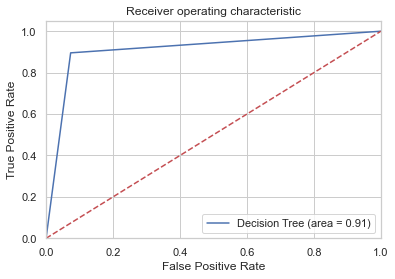

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc3 = roc_auc_score(os_test_y.astype(int), dtm.predict(X_tested.astype(float)))
fpr3, tpr3, thresholds3 = roc_curve(os_test_y.astype(int), dtm.predict_proba(X_tested.astype(float))[:,1])
plt.figure()
plt.plot(fpr3, tpr3, label='Decision Tree (area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
for importance, name in sorted(zip(dtm.feature_importances_, os_test_X.columns),reverse=True)[:54]:
    print (name, importance)

duration 0.3947138898648542
nr.employed 0.14532940561378632
cons.conf.idx 0.08089275600737605
contact 0.07821305680695112
euribor3m 0.04077665584578273
cons.price.idx 0.03394330270417512
age 0.03340947204296069
campaign 0.012285784694251841
education_high.school 0.010507039003174722
day_of_week_mon 0.010256281727792686
day_of_week_thu 0.009870409622560795
pdays 0.00966113391670176
emp.var.rate 0.009158313537606735
day_of_week_tue 0.00897370553270591
education_university.degree 0.008737981112016837
housing_yes 0.007678498867867529
day_of_week_wed 0.007522223098604456
education_professional.course 0.007285484227145905
marital_married 0.006703504167094391
education_basic.9y 0.006685066509723987
job_blue-collar 0.006428060047282532
month_jul 0.006416486721339101
previous 0.006059265103806495
marital_single 0.005779333109417679
month_oct 0.005650084271383412
job_technician 0.004697335966802676
loan_yes 0.003857307440343344
poutcome_nonexistent 0.003579777133774846
default_unknown 0.00351098

Note: De acordo com o classificador Decision Tree, esta é a classificação de acordo com a ordem de importância.

# 7. Conclusão

A campanha de promoção de vendas de depósito bancário à prazo, por meio de telemarketing, obteve subscrição de apenas 11 %, obtido na visualização de dados. Com os dados preparados, balanceados e normalizados, foi possível treinar finalmente os dados.
O modelo ajustado com LogisticRegression do módulo sklearn, obteve um escore de 93% durante na fase de treinamento. Depois na fase de CRV (Cross validation), obteve-se 31008 TN, 30577 TP, 1875 FP, 2308 FN por meio da matriz de confusão. Mostrando-se um modelo bastante equilibrado, confirmado com o desempenho das métricas accuracy (acurácia) de 94%, weighted avg (média ponderada) com 94% de precision (precisão), 94% de recall, 94% de f1-score e 89.4% de AUC. Na fase de teste com 10% do dataset, foi realizado o ajuste com o modelo e foi obtido um escore de 94.8%, obteve-se uma matriz de confusão com 3507 de TN, 3443 de TP, 158 de FP e 222 de FN. Utilizando-se da predição da variável y (subscrição ou não ao depósito a termo) com o y real, obteve-se a classificação com o accuracy de 95%, weighted avg de precision de 95%, recall de 95%, f1-score de 95% e AUC de 95%. Mostrando que o modelo obtido na fase de treinamento é também ajustado para a fase de teste. As métricas tiveram um bom desempenho porque não foram descartados nenhumas das 54 features, inclusive aquelas geradas pelas variáveis dummy. 

Na análise qualitativa foi possível entender melhor os perfis dos clientes que aceitaram a subscrição da campanha do depósito a termo. Estes tem em média 40 anos, tem formação no mínimo com ensino primário (de 9 anos) até o nível universitário,  trabalham na maioria como operário (blue-collar), aposentados, técnicos, em menor grau, funcionários administrativos, serviços, até estudante. Uma proporção de 64% de casados e 35% de solteiros. Menos de 5% tem empréstimo pessoal. Apesar da maioria desses clientes não terem sido abordados anteriormente em nenhuma campanha anterior, aqueles que foram abordados com sucesso na campanha passada se subscreveram com maior chance de sucesso na atual campanha. Estes foram abordados 2.78 vezes mais anteriormente que aqueles que não aceitaram nesta campanha. Na maior parte das vezes, os clientes foram abordados por meio de celular. Daqueles que não aceitaram, 40% foram atendidos por meio de telefone fixo. A duração média da chamada foi de 9.1 minutos contra 3.7 minutos para quem não se subscreveu. Aparentemente, o cliente que vai se subscrever tem a propensão de escutar mais. Os meses de maior abordagem ao cliente foram maio, junho, julho e agosto -correspondente ao verão europeu - porém novembro foi uma das 20 mais importante variável, segundo o RFE. Segunda-feira, foi considerado uma das 10 mais importante feature. O cliente teve em média 1.72 contatos contra 2.62 daqueles clientes que não aceitaram a campanha. As variáveis do momento sócio-econônomico, apesar de ter sido testada com o t-test do sklearn com pvalue < 1%, não dá para garantir que os índices sejam diferentes entre os casos positivos e os negativos, pois as médias estão entre 1-2% entre um e outro, estes são o caso do número de empregos, taxa de variação do emprego, índice do preço ao consumidor, e índice de confiança do consumidor, exceto a euribor3m que estava 55% do valor dos casos negativos, pois nem configuram entre os 30 features mais importantes, segundo o RFE.

Foram observados que com o RFE, que a amostra com as 40 mais importantes features, penaliza mais as features numéricas como age, duration, campaign, pdays, cons.price.idx, cons.conf.idx, euribor3m, nr.employed do que as features categóricas. E exige um pouco mais de esforço para realizar análise qualitativa, a abstração é maior sobre os valores das features categóricas para se chegar à uma conclusão plausível, como a utilização do t-test, verificar desvio padrão, etc. Dessa forma, utilizamos também o classificação do Logistic Regression para as features mais importantes (Feature Importances). Uma vantagem desse classificação é que os valores positivos dessas features são predições para aquelas features que influenciam as respostas positivas (classe 1) e as negativas (classe 0). Observamos que a taxa euribor3m no topo dos mais importantes, seguida de duration (duração em segundos da abordagem ao cliente), poutcome_success (sucesso na campanha passada), education_illiterate (educação analfabeto), cons.price.idx (índice do preço ao consumidor), month_mar (mês de março) e age (idade do cliente) que são todas de classe 1, as outras features são de classe 0. Pode-se observar que a classificação do Logistic Regression, não penaliza as features de valores numéricos. A única feature listada entre as 10 mais importante no RFE é o poutcome_success, que também é importante no Logistic Regression. Porém o Logistic Regression penaliza as features de cunho sócio econômicos, como o nr.employed (numéro de trabalhadores empregados), emp.var.rate (taxa de variação do emprego), education-university.degree eeducation.university (universitário), job_blue_collar (operário), diferente do RFE, que seriam importante para a classe 1. Não haveria razão lógica para listar o education_illiterate entre as principais, pois casos de analfabetos não significativos.

O Decision Tree (DT) parece realizar uma classificação mais balanceada entre as features categóricas e numéricas, tanto com os atributos do clientes e com as métricas sócio econômicos. No topo das features mais importante, estão o duration, nr.employed, cons.conf.idx, contact, euribor3m, age, cons.price.idx, campaign, education_high.school, day_of_week_mon. E as features realmente menos significativas, inclusive para o RFE, default_yes, marital_unknown, education_illiterate, month_mar, housing_unknown, job_unknown, month_dec, pdays_no_contact. E a vantagem do DT, é que se pode gerar um grafo com a árvore de decisão, onde há nós de decisão com subvalores das features numéricas, assim há vários nós de decisão com subvalores de duration, introduzindo um abstração maior para a análise qualitativa. 